We have a dataset which records 7 days sales of 3 products (ruler, pencil, eraser) from a stationery, we use it to do the data visualisation exercise

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Read the csv file called "Stationary_Sales.csv" to check data structrue

In [4]:
df = pd.read_csv("Stationary_Sales.csv")
df.head(6)

,Product,Date,Number,Price
0,Pencil,01/07/2020,51,3
1,Ruler,01/07/2020,37,7
2,Eraser,01/07/2020,54,2
3,Pencil,02/07/2020,34,3
4,Ruler,02/07/2020,55,7
5,Eraser,02/07/2020,36,2


### PART 1: Line chart
line chart represents the tendency of the data, always used in time series to predict future<br>
draw the line chart of sales of pencil in 7 days.

In [5]:
df_pencil = df[df.Product == "Pencil"]
df_pencil.head(3)

,Product,Date,Number,Price
0,Pencil,01/07/2020,51,3
3,Pencil,02/07/2020,34,3
6,Pencil,03/07/2020,47,3


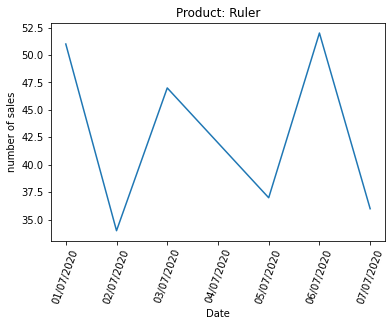

In [35]:
# x-axis: Date
# y-axis: Number
x = df_pencil.Date
y = df_pencil.Number
plt.plot(x,y)
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("number of sales")
plt.title("Product: Ruler")
plt.show()

For all 3 products,we can draw line plot for each and put them together, we use loop to realise this:

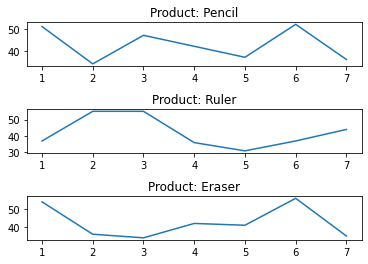

In [20]:
products = ["Pencil", "Ruler", "Eraser"]
fig, axs = plt.subplots(3)
def draw_sub(product, i):
    df_product = df[df.Product == product]
    x = [i for i in range(1,8)]
    y = df_product.Number
    axs[i].plot(x,y)
    axs[i].set_title("Product: {}".format(product))
for i in range(3):
    draw_sub(products[i], i)
plt.subplots_adjust(wspace =0, hspace =1)#调整子图间距
plt.show()

If we need to compare the sales among these 3 products, we can combine them into one plot

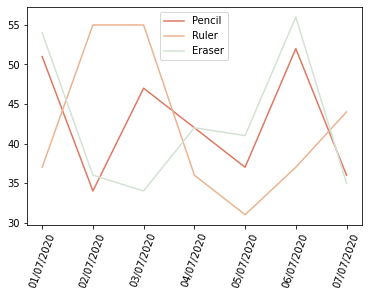

In [25]:
products = ["Pencil", "Ruler", "Eraser"]
colors = ["#df7861", "#ecb390", "#d4e2d4"]
def draw_sub(product, i, color):
    df_product = df[df.Product == product]
    x = df_product.Date
    y = df_product.Number
    plt.plot(x,y, color=color, label = product)
    plt.xticks(rotation=70)
for i in range(3):
    draw_sub(products[i], i, colors[i])
plt.legend() # 显示图例
plt.show()

### PART 2: Bar Chart

Use product pencil as an example, we plot income = number * price per unit in the bar chart

In [32]:
df_pencil_1 = df_pencil.Number * df_pencil.Price
df_pencil_1.head(3)

0    153
3    102
6    141
dtype: int64

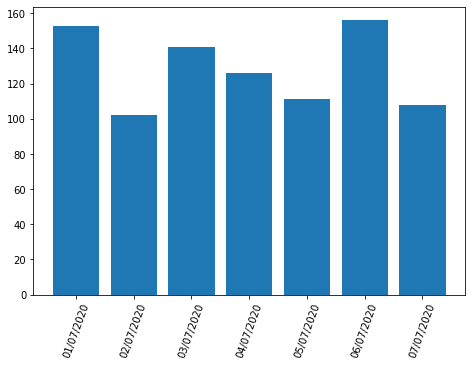

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df_pencil.Date
y = df_pencil_1
ax.bar(x,y)
plt.xticks(rotation=70)
plt.show()

Compare with other two products, we combine all bar into one plot

In [47]:
df_ruler = df[df.Product == "Ruler"]
df_eraser = df[df.Product == "Eraser"]
df_ruler_1 = df_ruler.Number * df_ruler.Price
df_eraser_1 = df_eraser.Number * df_eraser.Price

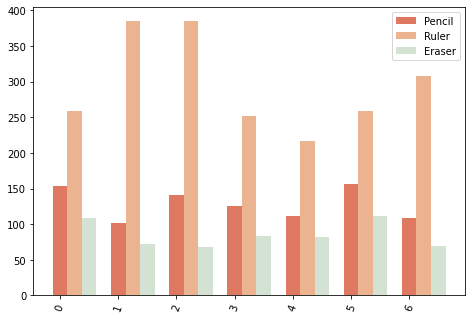

In [46]:
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(7)
ax.bar(X,df_pencil_1, color = colors[0], width = 0.25)
ax.bar(X+0.25,df_ruler_1, color = colors[1], width = 0.25)
ax.bar(X+0.5 ,df_eraser_1, color = colors[2], width = 0.25)
plt.xticks(rotation=70)
ax.legend(labels = ["Pencil", "Ruler", "Eraser"])
plt.show()

### PART 3. Pie Chart
Pie chart helps us to see the proportion of each products' sales income

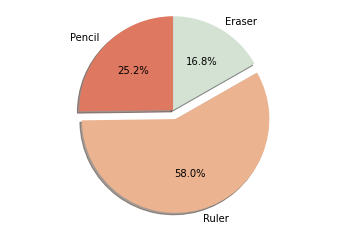

In [55]:
pencil = sum(df_pencil_1)
ruler = sum(df_ruler_1)
eraser = sum(df_eraser_1)
labels = ["Pencil", "Ruler", "Eraser"]
size = [pencil, ruler, eraser]
explode = (0,0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()